In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use ('seaborn')
%matplotlib inline
from matplotlib.pylab import rcParams
#rcParams [ 'figure.figsize'] = 15, 5
from plotly.graph_objs import*
from plotly.offline import init_notebook_mode, iplot, iplot_mpl 
init_notebook_mode ( ) 
from tqdm import tqdm 
import statsmodels.api as sm 
import warnings
warnings.filterwarnings ( 'ignore')
import seaborn as sns

/var/folders/v6/m5yfz9d55cldpkqcslw7nmch0000gn/T/ipykernel_83059/2229648423.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use ('seaborn')


ModuleNotFoundError: No module named 'plotly'

In [ ]:
df = pd.read_csv('/kaggle/input/nifty50-stock-market-data/ADANIPORTS.csv')
df. head (2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.0,770.0,1050.0,770.0,959.0,962.9,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.9,984.0,990.0,874.0,885.0,893.9,941.38,4581338,4.312765e+14,NaN,1453278,0.3172


In [ ]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [ ]:
df.shape

(3322, 15)

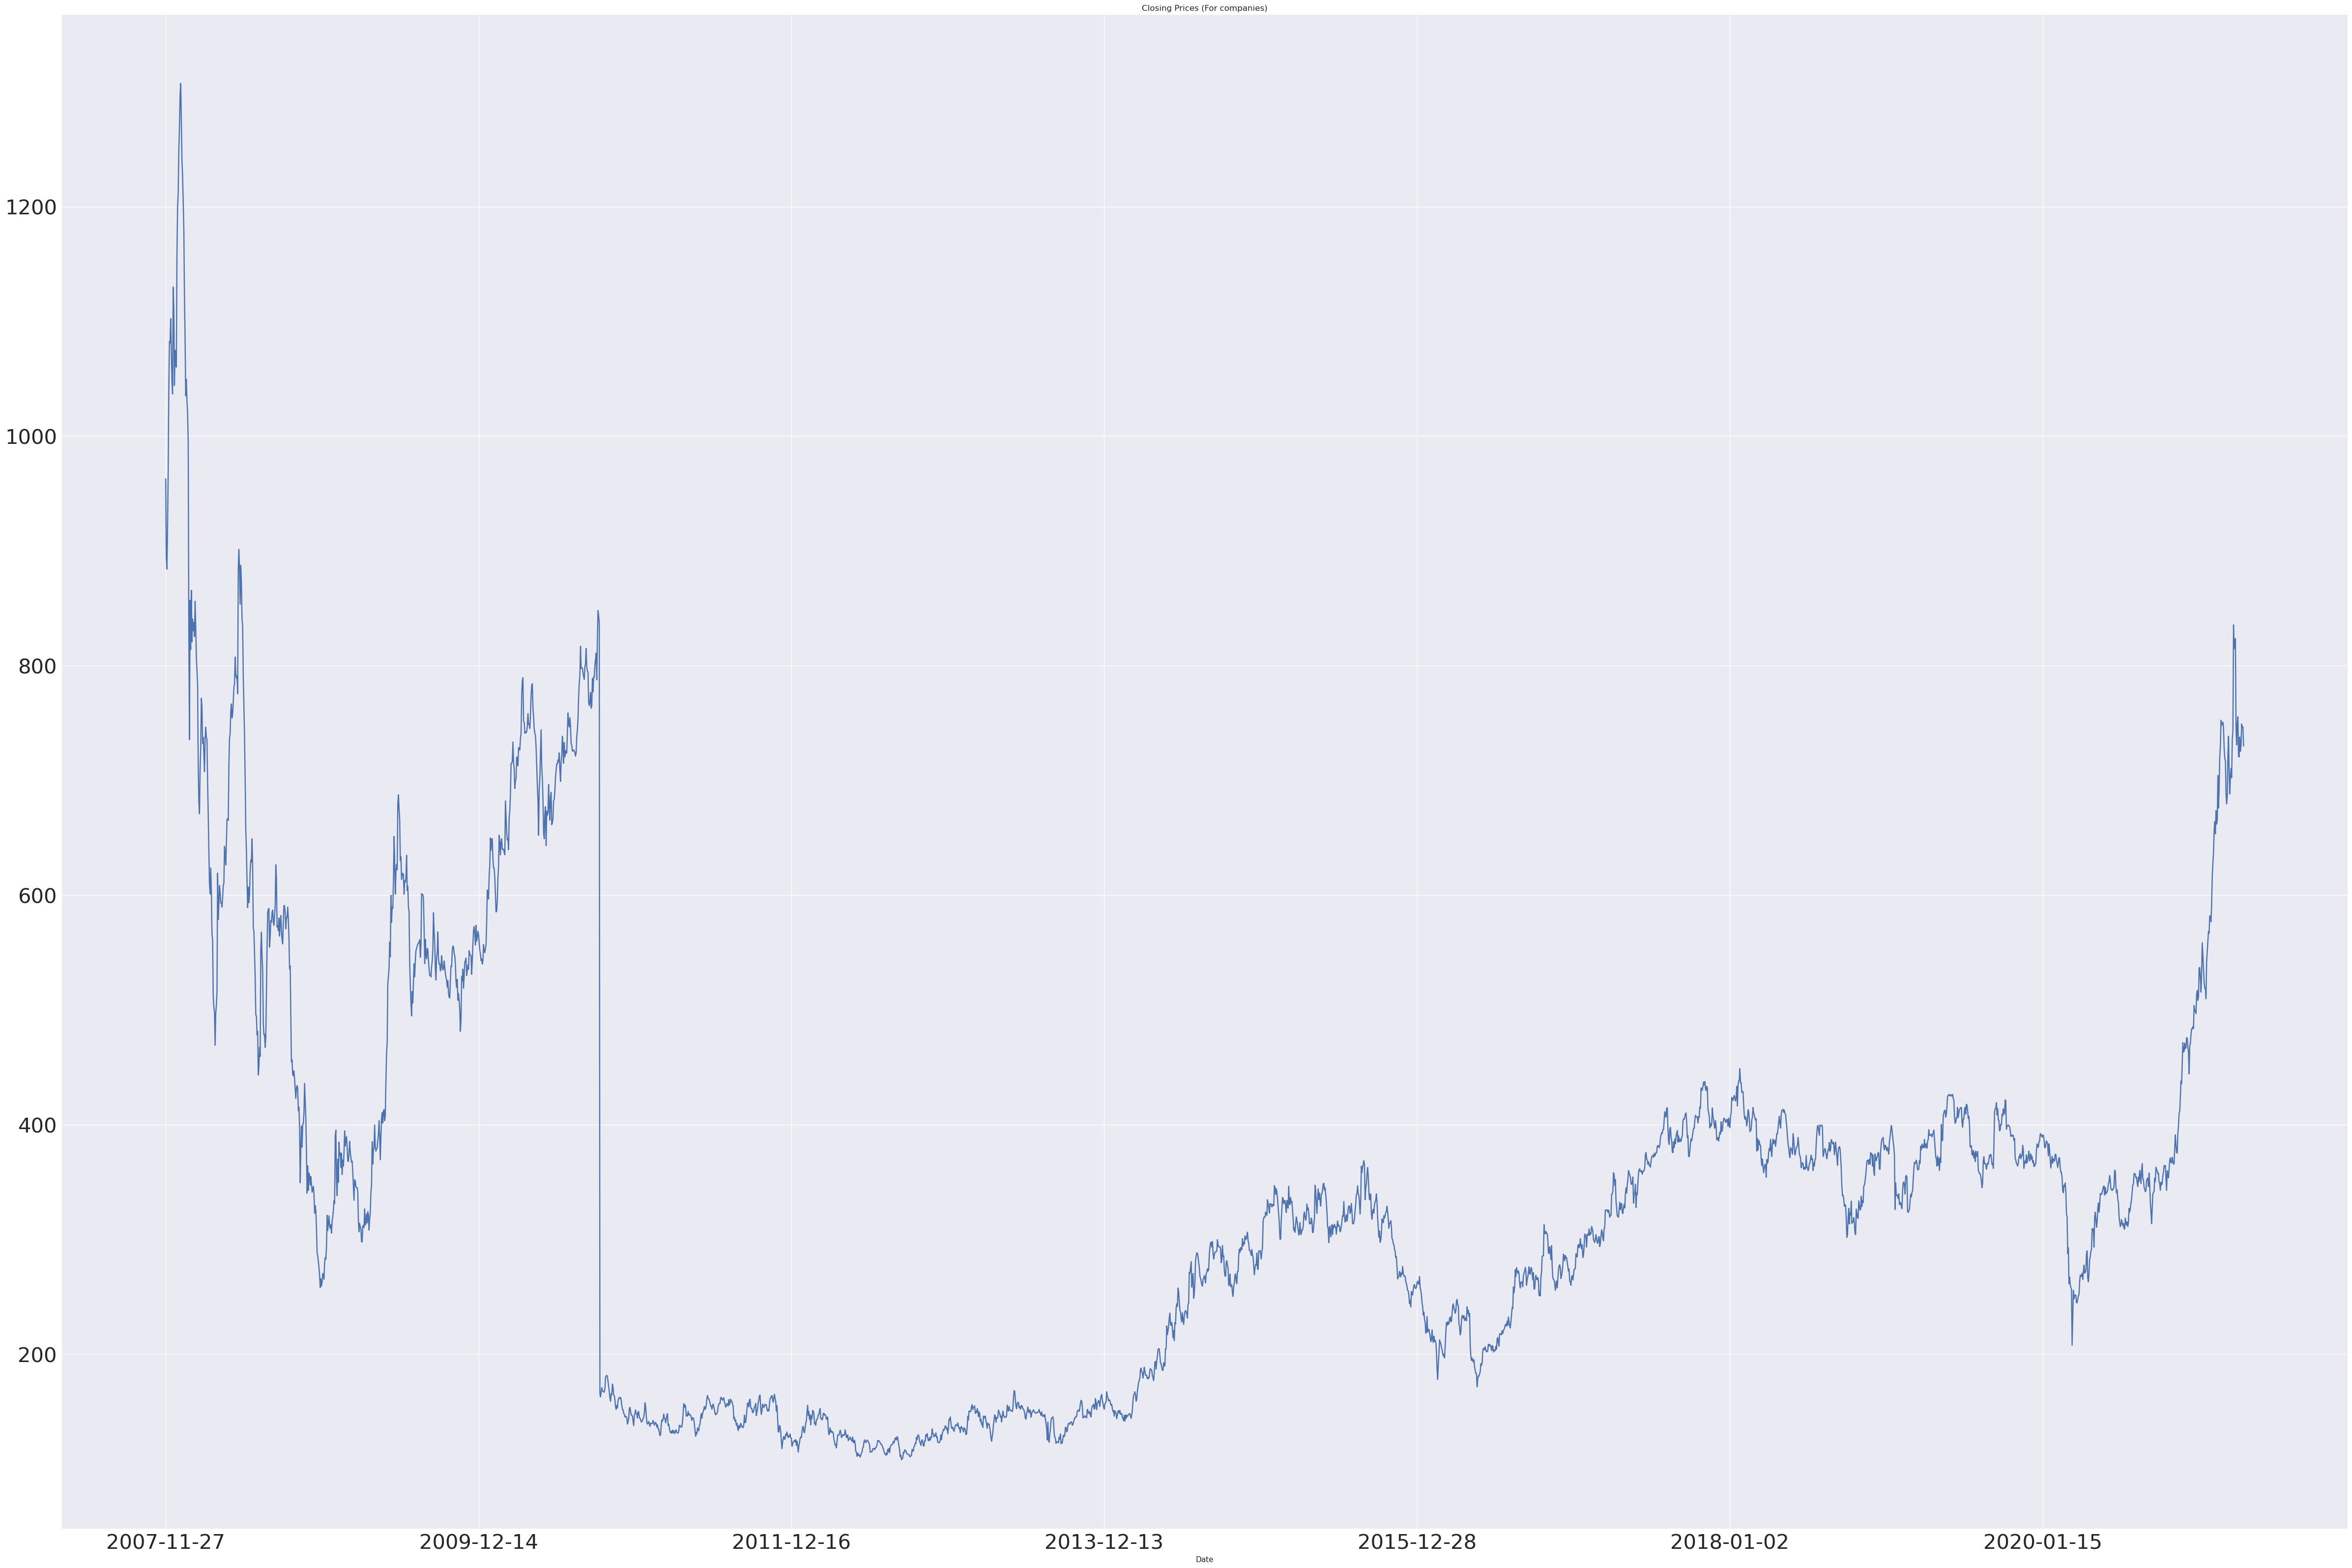

In [ ]:
df1= df.groupby ( [ 'Date' ]) [ 'Close']. mean ( )
df1.plot (figsize=(60,40), title= 'Closing Prices (For companies)', fontsize=30);

In [ ]:
import datetime

In [ ]:
df['year'] = pd.DatetimeIndex(df['Date']).year
print(df)

            Date      Symbol Series  Prev Close    Open     High     Low  \
0     2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00   
1     2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.00   
2     2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.00   
3     2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.00   
4     2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.00   
...          ...         ...    ...         ...     ...      ...     ...   
3317  2021-04-26  ADANIPORTS     EQ      725.35  733.00   739.65  728.90   
3318  2021-04-27  ADANIPORTS     EQ      730.75  735.00   757.50  727.35   
3319  2021-04-28  ADANIPORTS     EQ      749.15  755.00   760.00  741.10   
3320  2021-04-29  ADANIPORTS     EQ      746.25  753.20   765.85  743.40   
3321  2021-04-30  ADANIPORTS     EQ      746.75  739.00   759.45  724.50   

       Last   Close    VWAP    Volume      Turnover    Trades  \
0     959.0  962.90  9

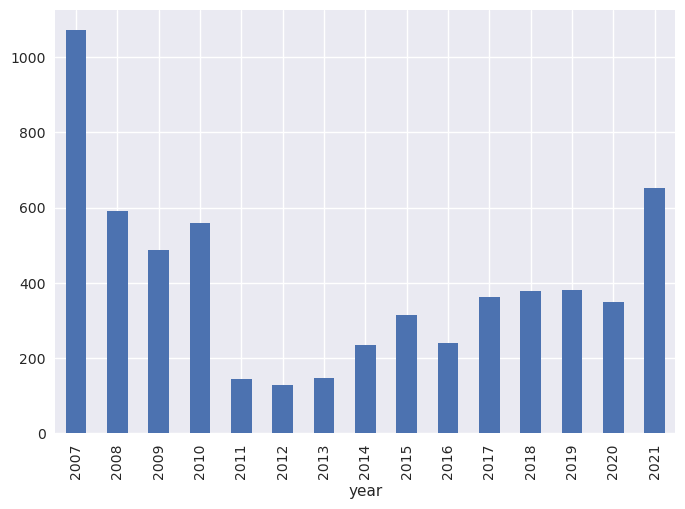

In [ ]:
df.groupby ('year') ['Close'].mean() .plot.bar ();

In [ ]:
df['month'] = pd.DatetimeIndex(df['Date']).month
print(df)

            Date      Symbol Series  Prev Close    Open     High     Low  \
0     2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00   
1     2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.00   
2     2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.00   
3     2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.00   
4     2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.00   
...          ...         ...    ...         ...     ...      ...     ...   
3317  2021-04-26  ADANIPORTS     EQ      725.35  733.00   739.65  728.90   
3318  2021-04-27  ADANIPORTS     EQ      730.75  735.00   757.50  727.35   
3319  2021-04-28  ADANIPORTS     EQ      749.15  755.00   760.00  741.10   
3320  2021-04-29  ADANIPORTS     EQ      746.25  753.20   765.85  743.40   
3321  2021-04-30  ADANIPORTS     EQ      746.75  739.00   759.45  724.50   

       Last   Close    VWAP    Volume      Turnover    Trades  \
0     959.0  962.90  9

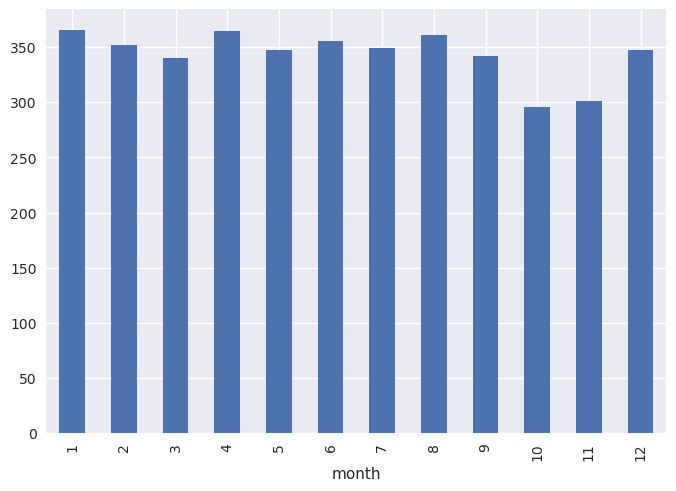

In [ ]:
df.groupby ('month') ['Close'].mean() .plot.bar ();

<AxesSubplot:>

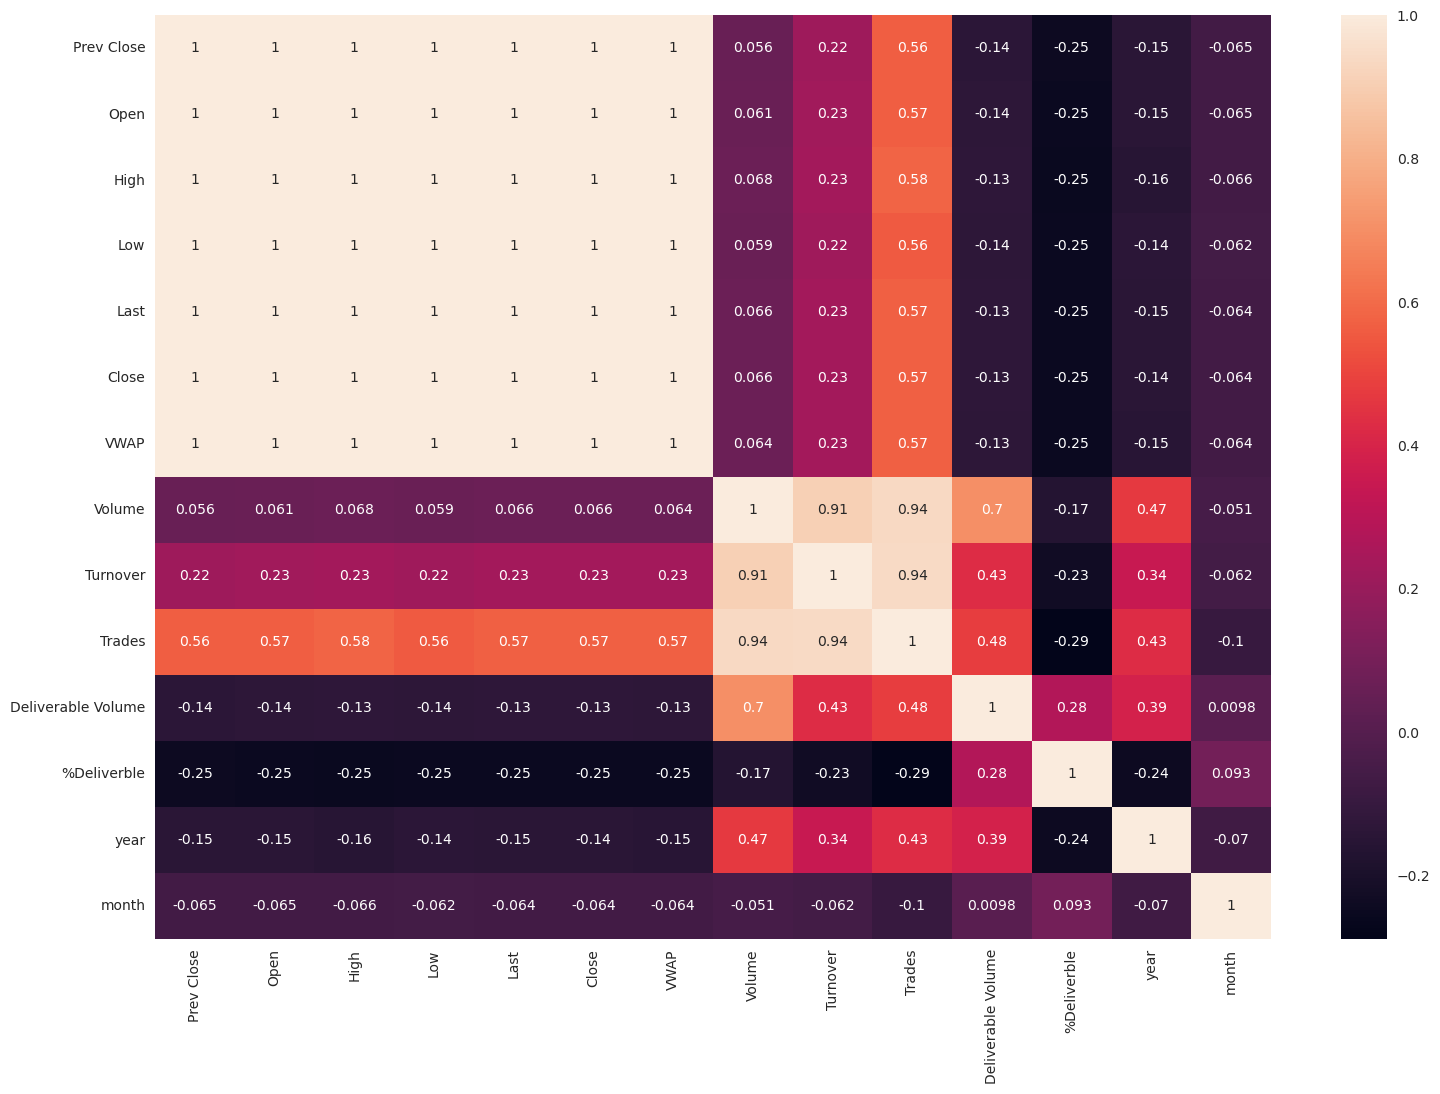

In [ ]:
corr = df.corr ( )
plt.figure(figsize= (18,12))
sns.heatmap(corr,annot=True)

In [ ]:
df.shape

(3322, 17)

In [ ]:
X_train = df[:2665]
X_test = df [2666:]

<Figure size 1200x800 with 0 Axes>

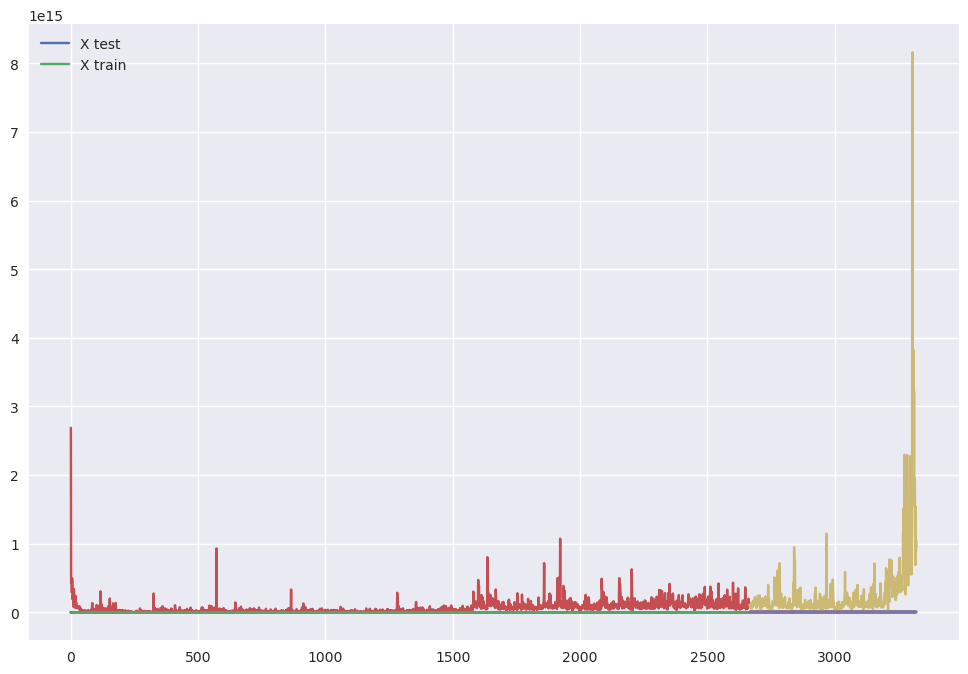

In [ ]:
plt.figure(figsize = (12, 8));
ax = X_train.plot(grid = True, figsize = (12, 8));
X_test.plot (ax=ax, grid=True);
plt.legend(['X test','X train']);
plt.show ();

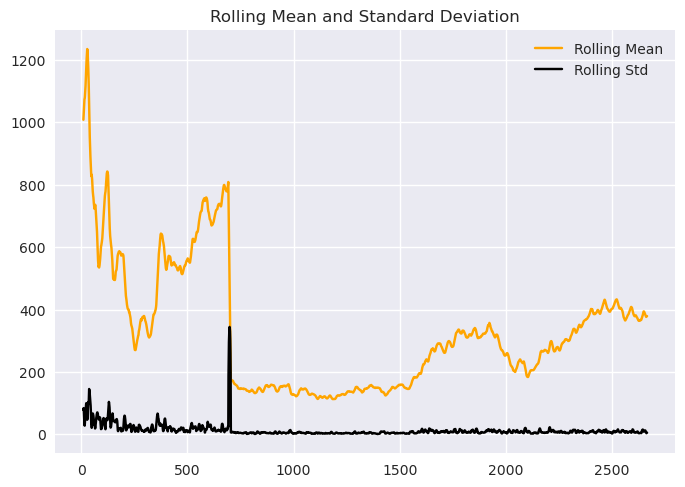

Results of Dickey-Fuller Test:
Test Statistic              -3.344709
p-value                      0.012994
#Lags Used                   4.000000
Number of Observations    2660.000000
Critical Value (1%)         -3.432811
Critical Value (5%)         -2.862627
Critical Value (10%)        -2.567349
dtype: float64


In [ ]:
#define function for ADF test 
from statsmodels.tsa.stattools import adfuller
def adf_test_stationary (timeseries):
#Determing rolling statistics
    rolmean= timeseries.rolling(12).mean( )
    rolstd= timeseries.rolling (12).std()
    #Plot rolling statistics: plt.plot (timeseries, color= 'blue',label='Original')
    plt.plot (rolmean, color= 'orange', label='Rolling Mean' )
    plt.plot (rolstd, color='black', label = 'Rolling Std')
    plt.legend (loc='best')
    plt.title ('Rolling Mean and Standard Deviation')
    plt.show (block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller (timeseries, autolag= 'AIC')
    dfoutput = pd.Series (dftest [0:4], index= ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations'])
    for key,value in dftest[4].items ( ): 
        dfoutput[ 'Critical Value (%s)'%key] = value
    print (dfoutput) 
    
#apply adf test on the series
adf_test_stationary(X_train['Close'])

In [ ]:
pit = sm.graphics.tsa.plot_acf(X_train['Close'], lags=40)
plt.show ()

NameError: name 'sm' is not defined

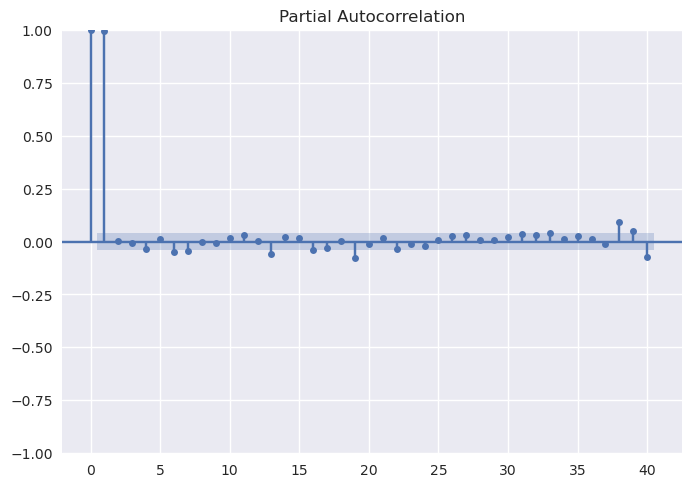

In [ ]:
pit = sm.graphics.tsa.plot_pacf(X_train['Close'], lags=40)
plt.show ()

In [ ]:
from pyramid import auto_arima
model =auto_arima(X_train_log, trace=True, error_action='ignore', suppress_warnings=True)
model.fit (X_train_log)
forecast = model.predict (n_periods=len(X_test))
forecast = pd. DataFrame (forecast, index = X_test_log.index, columns= ['Prediction' ]) #plot the predictions for validation set 
plt.plot (X_train_log, label='Train') 
plt.plot (X_test_log, label='Test')
plt.plot (forecast, label='Prediction') 
plt.title('Adani Port Stock Price Prediction')
plt.xlabel ('Time')
plt.ylabel ('Actual Stock Price') 
plt.legend(loc='upper left', fontsize=8)
plt.show()

ModuleNotFoundError: No module named 'pyramid.arima'